In [1]:
import numpy as np
import pandas as pd
import operator
from random import randrange
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
col_names = ['buyingprice', 'maintenancecost', 'doors',
             'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car_evaluation.csv',names=col_names)

In [3]:
df.head()


,buyingprice,maintenancecost,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df['class'].value_counts()


class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

<Axes: xlabel='class'>

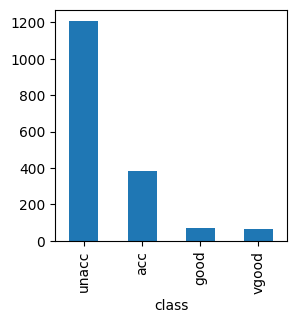

In [5]:
df['class'].value_counts().plot(kind = 'bar',figsize=(3,3))

In [6]:
df.describe()


,buyingprice,maintenancecost,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
df.isna().sum()


buyingprice        0
maintenancecost    0
doors              0
persons            0
lug_boot           0
safety             0
class              0
dtype: int64

In [8]:
buying_label = {ni: n for n, ni in enumerate(set(df['buyingprice']))}
maintenancecost_label = {ni: n for n,
                         ni in enumerate(set(df['maintenancecost']))}
doors_label = {ni: n for n, ni in enumerate(set(df['doors']))}
persons_label = {ni: n for n, ni in enumerate(set(df['persons']))}
lug_boot_label = {ni: n for n, ni in enumerate(set(df['lug_boot']))}
safety_label = {ni: n for n, ni in enumerate(set(df['safety']))}
class_label = {ni: n for n, ni in enumerate(set(df['class']))}


In [9]:
print(f"buying_label : {buying_label}")
print(f"maintenancecost_label : {maintenancecost_label}")
print(f"doors_label : {doors_label}")
print(f"persons_label : {persons_label}")
print(f"lug_boot_label : {lug_boot_label}")
print(f"safety_label : {safety_label}")
print(f"class_label : {class_label}")


buying_label : {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3}
maintenancecost_label : {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3}
doors_label : {'5more': 0, '3': 1, '2': 2, '4': 3}
persons_label : {'2': 0, 'more': 1, '4': 2}
lug_boot_label : {'small': 0, 'med': 1, 'big': 2}
safety_label : {'high': 0, 'med': 1, 'low': 2}
class_label : {'vgood': 0, 'good': 1, 'acc': 2, 'unacc': 3}


In [10]:
df['buyingprice'] = df['buyingprice'].map(buying_label)
df['maintenancecost'] = df['maintenancecost'].map(maintenancecost_label)
df['doors'] = df['doors'].map(doors_label)
df['persons'] = df['persons'].map(persons_label)
df['lug_boot'] = df['lug_boot'].map(lug_boot_label)
df['safety'] = df['safety'].map(safety_label)
df['class'] = df['class'].map(class_label)


In [11]:
df

,buyingprice,maintenancecost,doors,persons,lug_boot,safety,class
0,0,0,2,0,0,1,3
1,0,0,2,0,0,0,3
2,0,0,2,0,1,2,3
3,0,0,2,0,1,1,3
4,0,0,2,0,1,0,3
...,...,...,...,...,...,...,...
1722,3,3,0,1,1,1,1
1723,3,3,0,1,1,0,0
1724,3,3,0,1,2,2,3
1725,3,3,0,1,2,1,1


<Axes: >

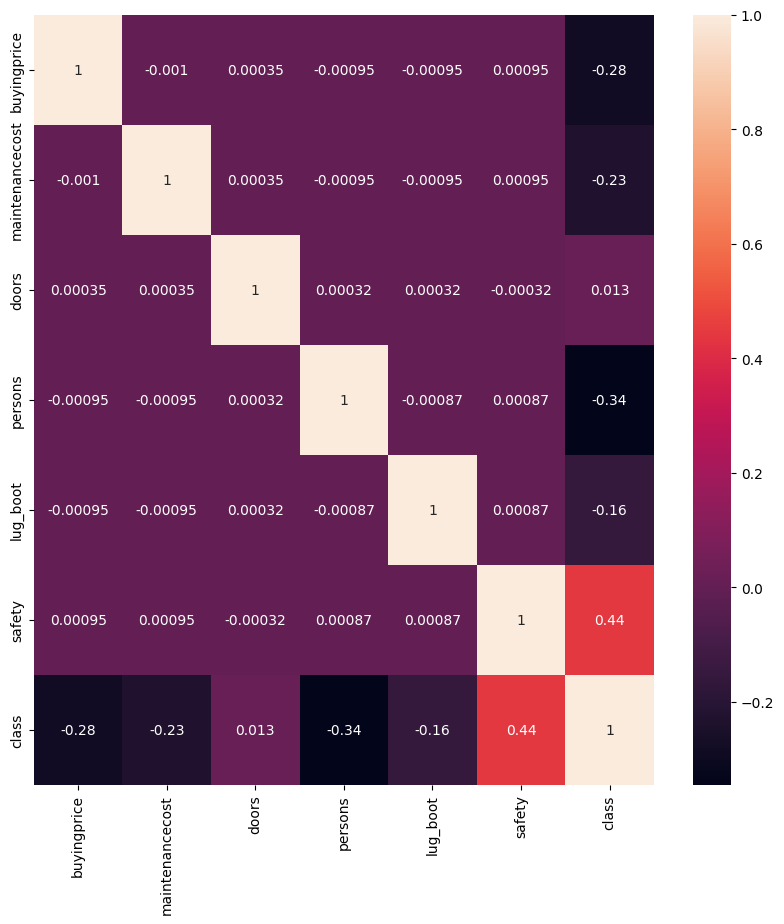

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True)

In [13]:
class distance_metrics:
    def __init__(self):
        pass

    def euclidean_distance(self, list1, list2):
        self.lista, self.listb = list1, list2
        if len(self.lista) != len(self.listb):
            raise ValueError("Undefined for sequences of unequal length.")
        distance = 0.0
        for i in range(len(self.lista)-1):
            distance += (self.lista[i] - self.listb[i])**2
        return (distance)**0.5

    def manhattan_distance(self, list1, list2):
        self.lista, self.listb = list1, list2
        if len(self.lista) != len(self.listb):
            raise ValueError("Undefined for sequences of unequal length.")
        return np.abs(np.array(self.lista) - np.array(self.listb)).sum()

In [14]:
class knn_class:
    def __init__(self, k=5, distance_metric='euclidean'):
        pass

    def fit(self, x_train, y_train):
        assert len(x_train) == len(y_train)
        self.train_data = x_train
        self.train_labels = y_train

    def get_neighbors(self, test_row):
        calculate_distance_matrux = distance_metrics()
        distances = []
        for i, train_row in enumerate(self.train_data):
            if self.distance_metric == 'euclidean':
                distances.append([train_row, calculate_distance_matrux.euclidean_distance(
                    test_row, train_row), self.train_labels[i]])
            elif self.distance_metric == 'manhattan':
                distances.append([train_row, calculate_distance_matrux.manhattan_distance(
                    test_row, train_row), self.train_labels[i]])
            distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for index in range(self.k):
            neighbors.append(distances[index])
        return neighbors

    def predict(self, x_test, k, distance_metric):
        self.test_data = x_test
        self.k = k
        self.distance_metric = distance_metric
        predictions = []

        for i, test_case in enumerate(self.test_data):
            neighbors = self.get_neighbors(test_case)
            output = [row[-1] for row in neighbors]
            prediction = max(set(output), key=output.count)
            predictions.append(prediction)
        return predictions


In [15]:
def calculate_accuracy(actual, predictions):
    assert len(actual) == len(predictions)
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predictions[i]:
            correct += 1
    return (correct / float(len(actual)) * 100.0)


In [16]:
class k_fold_cross_validation:
    def __init__(self):
        pass
    
    def cros_validation_split(self, dataset, num_folds):
        data_split = list()
        data_copy = list(dataset)
        foldSize = int(len(dataset) / num_folds)
        for _ in range(num_folds):
            fold = list()
            while len(fold) < foldSize:
                index = randrange(len(data_copy))
                fold.append(data_copy.pop(index))
            data_split.append(fold)
        return data_split

    def k_fold_cross_validation_evaluation(self, dataset, num_folds, *args):
        knn = knn_class()
        folds = self.cros_validation_split(dataset, num_folds)
        scores = list()
        for fold in folds:
            train_set = list(folds)
            train_set.remove(fold)
            train_set = sum(train_set, [])
            test_set = list()
            for row in fold:
                rowCopy = list(row)
                test_set.append(rowCopy)

            train_labels = [row[-1] for row in train_set]
            train_set = [train[:-1] for train in train_set]
            knn.fit(train_set, train_labels)

            actual = [row[-1] for row in test_set]
            test_set = [test[:-1] for test in test_set]
            predicted = knn.predict(test_set, *args)

            accuracy = calculate_accuracy(actual, predicted)
            scores.append(accuracy)
        print(f"Scores: {scores}")
        print(f"Maximum Accuracy: {max(scores)}" )
        print(f"Mean Accuracy: {sum(scores)/float(len(scores))}")


In [17]:
car_features = df.values.tolist()
print(car_features)

[[0, 0, 2, 0, 0, 1, 3], [0, 0, 2, 0, 0, 0, 3], [0, 0, 2, 0, 1, 2, 3], [0, 0, 2, 0, 1, 1, 3], [0, 0, 2, 0, 1, 0, 3], [0, 0, 2, 0, 2, 2, 3], [0, 0, 2, 0, 2, 1, 3], [0, 0, 2, 0, 2, 0, 3], [0, 0, 2, 2, 0, 2, 3], [0, 0, 2, 2, 0, 1, 3], [0, 0, 2, 2, 0, 0, 3], [0, 0, 2, 2, 1, 2, 3], [0, 0, 2, 2, 1, 1, 3], [0, 0, 2, 2, 1, 0, 3], [0, 0, 2, 2, 2, 2, 3], [0, 0, 2, 2, 2, 1, 3], [0, 0, 2, 2, 2, 0, 3], [0, 0, 2, 1, 0, 2, 3], [0, 0, 2, 1, 0, 1, 3], [0, 0, 2, 1, 0, 0, 3], [0, 0, 2, 1, 1, 2, 3], [0, 0, 2, 1, 1, 1, 3], [0, 0, 2, 1, 1, 0, 3], [0, 0, 2, 1, 2, 2, 3], [0, 0, 2, 1, 2, 1, 3], [0, 0, 2, 1, 2, 0, 3], [0, 0, 1, 0, 0, 2, 3], [0, 0, 1, 0, 0, 1, 3], [0, 0, 1, 0, 0, 0, 3], [0, 0, 1, 0, 1, 2, 3], [0, 0, 1, 0, 1, 1, 3], [0, 0, 1, 0, 1, 0, 3], [0, 0, 1, 0, 2, 2, 3], [0, 0, 1, 0, 2, 1, 3], [0, 0, 1, 0, 2, 0, 3], [0, 0, 1, 2, 0, 2, 3], [0, 0, 1, 2, 0, 1, 3], [0, 0, 1, 2, 0, 0, 3], [0, 0, 1, 2, 1, 2, 3], [0, 0, 1, 2, 1, 1, 3], [0, 0, 1, 2, 1, 0, 3], [0, 0, 1, 2, 2, 2, 3], [0, 0, 1, 2, 2, 1, 3], [0, 0, 1, 

In [18]:
car_labels = [car[-1] for car in car_features]
print(car_labels)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [19]:
model_knn = k_fold_cross_validation()
model_knn.k_fold_cross_validation_evaluation(car_features, 5, 5,'euclidean')

Scores: [65.5072463768116, 61.73913043478261, 67.82608695652173, 70.43478260869566, 63.47826086956522]
Maximum Accuracy: 70.43478260869566
Mean Accuracy: 65.79710144927537


In [20]:
model_knn.k_fold_cross_validation_evaluation(car_features, 5, 5, 'manhattan')

Scores: [94.4927536231884, 95.3623188405797, 95.07246376811594, 93.91304347826087, 94.20289855072464]
Maximum Accuracy: 95.3623188405797
Mean Accuracy: 94.6086956521739
